In [1]:
import pandas as pd

In [2]:
import re

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [36]:
import joblib

In [10]:
column_names = ["target", "id", "date", "query", "user", "text"]

In [11]:
df = pd.read_csv("sentiment.csv", encoding="ISO-8859-1", names=column_names)

In [12]:
df = df.drop(['id', 'query', 'user'], axis=1)

In [13]:
df['target'] = df['target'].replace({0: 'negative', 4: 'positive'})

In [14]:
stop_words = set(stopwords.words('english'))

In [15]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www.\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)


df['text'] = df['text'].apply(preprocess_text)

In [16]:
print(df['target'].value_counts())

target
negative    800000
positive    800000
Name: count, dtype: int64


In [17]:
print(df.head())

     target                          date  \
0  negative  Mon Apr 06 22:19:45 PDT 2009   
1  negative  Mon Apr 06 22:19:49 PDT 2009   
2  negative  Mon Apr 06 22:19:53 PDT 2009   
3  negative  Mon Apr 06 22:19:57 PDT 2009   
4  negative  Mon Apr 06 22:19:57 PDT 2009   

                                                text  
0  awww thats bummer shoulda got david carr third...  
1  upset cant update facebook texting might cry r...  
2  dived many times ball managed save rest go bounds  
3                   whole body feels itchy like fire  
4                           behaving im mad cant see  


In [18]:
X = df['text']

In [19]:
y = df['target']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 1280000
Test set size: 320000


In [22]:
vectorizer = TfidfVectorizer()

In [23]:
X_train_tfidf = vectorizer.fit_transform(X_train)

In [24]:
X_test_tfidf = vectorizer.transform(X_test)

In [25]:
print("TF-IDF matrix shape (train):", X_train_tfidf.shape)
print("TF-IDF matrix shape (test):", X_test_tfidf.shape)

TF-IDF matrix shape (train): (1280000, 358013)
TF-IDF matrix shape (test): (320000, 358013)


In [26]:
model = LogisticRegression(max_iter=1000, random_state=42)

In [27]:
model.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [28]:
print("Training complete!")

Training complete!


In [37]:
joblib.dump(model, 'model.joblib')

['model.joblib']

In [29]:
y_pred = model.predict(X_test_tfidf)

In [30]:
accuracy = accuracy_score(y_test, y_pred)

In [31]:
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7842


In [32]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.77      0.78    160000
    positive       0.77      0.80      0.79    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



In [33]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[122609  37391]
 [ 31672 128328]]


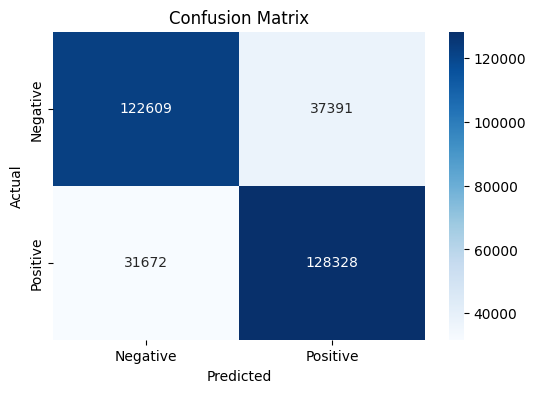

In [34]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
sample_indices = y_test.sample(10, random_state=42).index

for idx in sample_indices:
    text = X_test.loc[idx]
    actual = y_test.loc[idx]
    pred = model.predict(vectorizer.transform([text]))[0]
    print(f"Tweet: {text}")
    print(f"Actual Sentiment: {actual}")
    print(f"Predicted Sentiment: {pred}")
    print("-" * 50)

Tweet: going walk explore surrounding area
Actual Sentiment: positive
Predicted Sentiment: positive
--------------------------------------------------
Tweet: victorias house lab
Actual Sentiment: positive
Predicted Sentiment: positive
--------------------------------------------------
Tweet: oh dear
Actual Sentiment: negative
Predicted Sentiment: negative
--------------------------------------------------
Tweet: dont think vote anymore tried
Actual Sentiment: negative
Predicted Sentiment: negative
--------------------------------------------------
Tweet: went gokarting today wearing awesome new shirt gabriel brothers lt store
Actual Sentiment: positive
Predicted Sentiment: positive
--------------------------------------------------
Tweet: nice definition sun person considered source warmth energy glory
Actual Sentiment: positive
Predicted Sentiment: positive
--------------------------------------------------
Tweet: tummy hurts
Actual Sentiment: negative
Predicted Sentiment: negative
--